In [7]:
from hossam import load_data 

from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
from math import sqrt

from scipy.stats import t, ttest_1samp, normaltest

In [8]:
my_dpi = 200                                    # 이미지 선명도(100~300)
font_path = "./NotoSansKR-Regular.ttf"          # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)               # 폰트의 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname=font_path)  # 폰트의 속성을 읽어옴
font_name = font_prop.get_name()                # 읽어온 속성에서 폰트의 이름만 추출     
plt.rcParams['font.family'] = font_name         # 그래프에 한글 폰트 적용
plt.rcParams['font.size'] = 10                  # 기본 폰트크기
plt.rcParams['axes.unicode_minus'] = False      # 그래프에 마이너스 깨짐 방지(한글환경에서 필수)

In [9]:
origin = load_data('dog_temperature')

print("\m===== 데이터 크기 확인 =====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

print("\n===== 타입확인 =====")
print(origin.info())

origin.head()

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\itwill\AppData\Local\Temp\ipykernel_11032\198015826.py:3: SyntaxWarning: invalid escape sequence '\m'
  print("\m===== 데이터 크기 확인 =====")


[data] https://data.hossam.kr/data/lab10/dog_temperature.xlsx
[desc] 강아지 25마리의 체온을 측정한 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata
\m===== 데이터 크기 확인 =====
데이터셋 크기: (25, 1)
열 개수: 1
행 개수: 25

===== 타입확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   체온      25 non-null     float64
dtypes: float64(1)
memory usage: 332.0 bytes
None


,체온
0,25.8
1,24.6
2,26.1
3,22.9
4,25.1


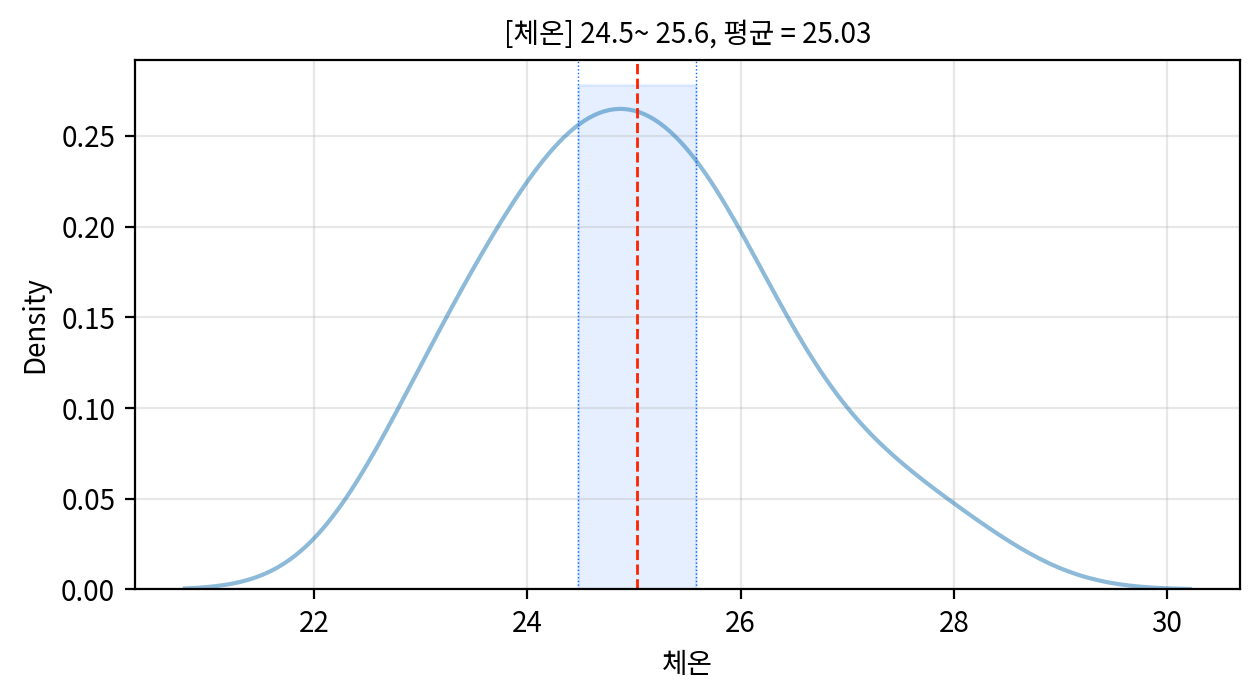

In [14]:
data = origin['체온']
max = data.max()
clevel = 0.95
dof = len(data) -1
sp_mean = data.mean()
sp_std = data.std(ddof=1)
sp_std_error = sp_std / sqrt(len(data))
# 신뢰구간 
cmin, cmax =t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.kdeplot(data=data, fill=False, alpha=0.5)

#신뢰구간 범위 그리기
ax.axvline(cmin, linestyle=':', color='#0066ff', linewidth=0.5)
ax.axvline(cmax, linestyle=':', color = '#0066ff', linewidth=0.5)

#현재 축 범위 가져오기
ymin, ymax = ax.get_ylim()
ax.fill_between([cmin, cmax],0,ymax,alpha=0.1, color='#0066ff88')
#평균 표시
ax.axvline(sp_mean, linestyle='--', linewidth=1, color='#ff2200')
ax.grid(True, alpha=0.3)
ax.set_title(f"[{data.name}] {cmin:.1f}~ {cmax:.1f}, 평균 = {sp_mean:0.2f}", fontsize=10)




plt.tight_layout()
plt.show()
plt.close()

커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 표본평균(25.03)이 신뢰구간(24.5~25.6)에 포함되어 있으므로, 강아지의 체온이 정상범위에 있다고 할 수 있다.

In [16]:
s, p = normaltest(origin['체온'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s, p, p>0.05)


'statistic: 0.819, p-value: 0.664, 정규성 충족 여부: True'

p-value 가 0.664이므로 (P>0.05) 정규성을 충족한다.


In [18]:
s, p = ttest_1samp(origin['체온'], 24.3)
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p,"대립"if p<=0.05 else "귀무")

'statistic: 2.713, p-value: 0.012, 대립가설 채택'

In [20]:
s, p = ttest_1samp(origin['체온'], 24.3, alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p,"대립"if p<=0.05 else "귀무")

'statistic: 2.713, p-value: 0.994, 귀무가설 채택'

In [22]:
s, p =ttest_1samp(origin['체온'], 24.3, alternative='greater')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p,"대립"if p<=0.05 else "귀무")

'statistic: 2.713, p-value: 0.006, 대립가설 채택'

예제2번 생명보험 가입 금액 평균 비교


In [25]:
origin = load_data('insur')
origin.head()

[data] https://data.hossam.kr/data/lab10/insur.xlsx
[desc] 어느 보험회사에서 한해 동안 모집한 가입원들에 대한 가입 정보 (출처: 방송통신대학교 통계학개론)

field     description
--------  ------------------------------------------------------
직업      1=육체노동, 2=정신노동(직상인), 3=자영업
교육수준  1=초등학교 이하, 2=중졸 및 고졸, 3=대졸, 4=대학원 졸업
성별      1=남자, 2=여자
나이      숫자
가입금액  단위=천만원
월수입    단위=만원



,직업,교육수준,성별,나이,가입금액,월수입
0,1,2,1,35,15.0,100
1,2,3,1,40,10.0,150
2,2,3,2,36,8.0,120
3,3,4,2,38,12.0,140
4,1,1,1,45,10.0,150


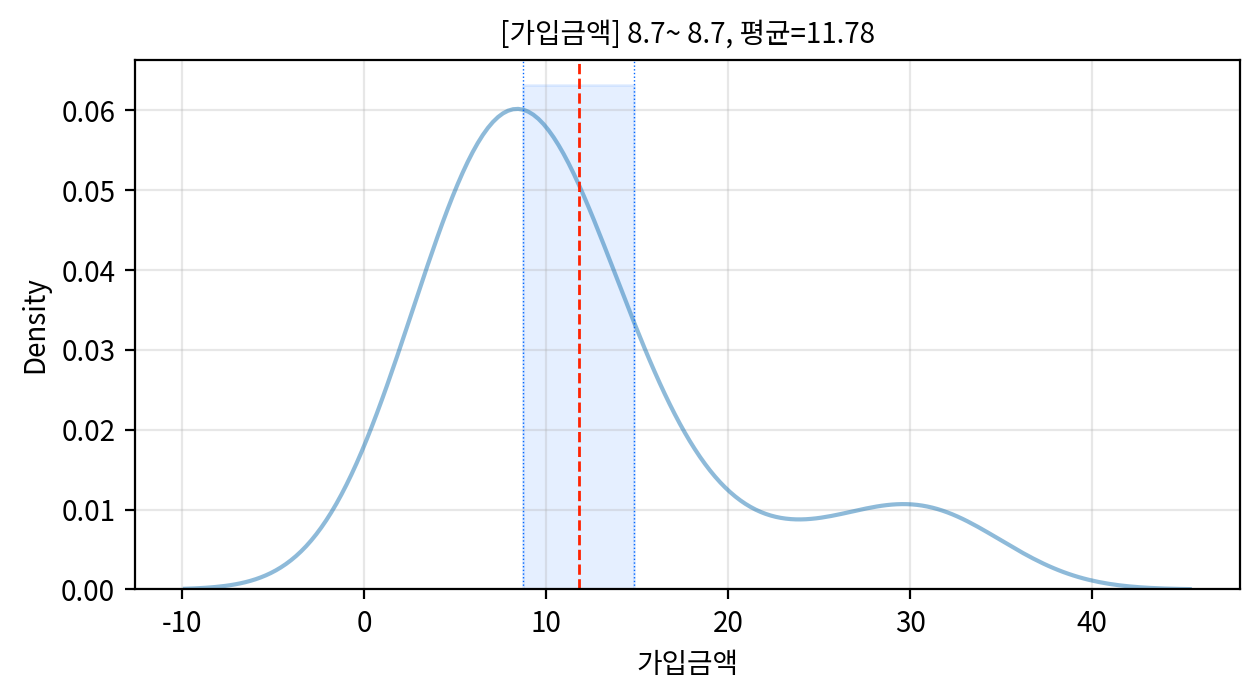

In [30]:
data = origin['가입금액']                    # 확인할 데이터(컬럼단위)
max = data.max()                            #최대값
clevel = 0.95                               #신뢰수준
dof = len(data) - 1                         #자유도
sp_mean = data.mean()                       #표본평균
sp_std = data.std(ddof=1)                   #표본표준편차
sp_std_error = sp_std / sqrt(len(data))     #표본표준오차

cmin, cmax =t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)


width_px = 1280
height_px =720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.kdeplot(data=data, fill=False, alpha = 0.5)
#신뢰구간 범위 그리기
ax.axvline(cmin, linestyle=':', color='#0066ff', linewidth=0.5)
ax.axvline(cmax, linestyle=':', color='#0066ff', linewidth=0.5)
# 현재 축 범위 가져오기
ymin, ymax = ax.get_ylim()
ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1, color="#0066ff88")

# 평균 표시
ax.axvline(sp_mean, linestyle='--', linewidth=1, color='#ff2200')

#그래프 꾸미기
ax.grid(True,alpha=0.3)
ax.set_title(f"[{data.name}] {cmin:.1f}~ {cmin:.1f}, 평균={sp_mean:0.2f}", fontsize=10)



plt.tight_layout()
plt.show()
plt.close()

표본평균(11.8)이 신뢰구간(8.7~14.8)에 포함되어 있으므로 가입금액의 데이터는 정상범위에 있다고 할 수 있지만, 커널 밀도 함수 그래프의 모양을 보았을 때 정규분포를 만족하지는 않고 있다.

In [31]:
s, p =normaltest(origin['가입금액'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s, p, p>0.05)

'statistic: 11.438, p-value: 0.003, 정규성 충족 여부: False'

주어진 데이터는 p-value가 0.003이므로 (P>0.05)정규성을 충족하지 않는다. 이 경우 가설검정의 결과를 신뢰할 수 없다.


In [32]:
log_data = np.log(origin['가입금액'])
log_data

0     2.708050
1     2.302585
2     2.079442
3     2.484907
4     2.302585
5     0.916291
6     2.197225
7     2.014903
8     1.704748
9     3.218876
10    2.351375
11    1.252763
12    2.272126
13    2.525729
14    3.401197
15    2.397895
16    2.174752
17    1.504077
18    2.054124
19    1.902108
20    1.945910
21    3.496508
22    2.708050
23    2.995732
24    1.386294
25    1.609438
26    2.708050
27    3.401197
28    1.609438
29    2.302585
Name: 가입금액, dtype: float64

In [34]:
target_value = np.log(10)
target_value

np.float64(2.302585092994046)

In [36]:
s, p = normaltest(log_data)
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족: {2}".format(s, p, p>0.05)

'statistic: 0.104, p-value: 0.950, 정규성 충족: True'

In [38]:
s, p =ttest_1samp(log_data, target_value)
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설채택".format(s, p,"대립"if p<=0.05 else"귀무")

'statistic: -0.326, p-value: 0.747, 귀무가설채택'

단일 표본 검정에서 유의확률이 유의수준 0.05보다 크므로, 보험 가입금액의 모평균이 1억원이라는 귀무가설을 기각할 수 없다.
즉, 보험 가입금액의 평균은 1억원이다.

In [40]:
s, p =ttest_1samp(log_data, target_value, alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설채택".format(s, p,"대립"if p<=0.05 else"귀무")

'statistic: -0.326, p-value: 0.374, 귀무가설채택'

단일 표본 검정에서 유의확률이 유의수준 0.05보다 크므로, 보험 가입금액의 모평균이 1억원보다 작지 않다는 귀무가설을 기각할 수 없다.

In [41]:
s, p = ttest_1samp(log_data, target_value, alternative='greater')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설채택".format(s, p,"대립"if p<0.05 else"귀무")

'statistic: -0.326, p-value: 0.626, 귀무가설채택'

단일 표본 검정에서 유의확률이 유의수준 0.05보다 크므로, 보험 가입금액의 모평균이 1억원보다 크지 않다는 귀무가설을 기각할 수 없다.